In [ ]:
import keras
import json
import sys
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
from keras.utils.data_utils import get_file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image



   age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2  67 70 71 70 69 67 70 79 90 103 116 132 145 155...  
3  193 197 198 200 199 200 202 203 204 205 208 21...  
4  202 205 209 210 209 209 210 211 212 214 218 21...  
Index(['age', 'ethnicity', 'gender', 'img_name', 'pixels'], dtype='object')


(-0.5, 47.5, 47.5, -0.5)

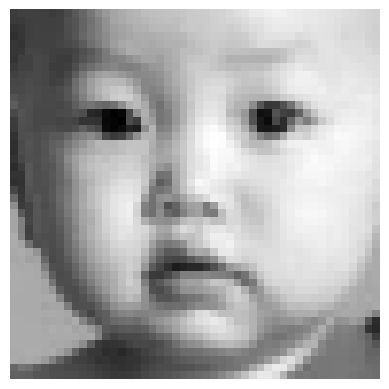

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/age_gender.csv.zip")
print(df.head())
print(df.columns)
df1= pd.DataFrame(df)
df1['pixels'] = df1.pixels.apply(lambda x: np.reshape(np.array(x.split(' '),dtype='float32'),(48,48)))
df1['pixels']= df1['pixels']/255
im = df1['pixels'][2]
im
plt.imshow(im, cmap='gray')
plt.axis('off')

In [ ]:
X = np.zeros(shape=(23705,48,48))
for i in range(len(df1["pixels"])):
    X[i] = df1["pixels"][i]
X.dtype


dtype('float64')

In [ ]:
#Age
ag = df1['age']
ag=ag.astype(float)
ag= np.array(ag)
ag.shape

(23705,)

In [ ]:
#Gender

g= df1['gender']
g=np.array(g)
g.shape

(23705,)

In [ ]:
labels_f =[]

i=0

while i <len(ag):

  label=[]

  label.append([ag[i]])

  label.append([g[i]])

  labels_f.append(label)

  i+=1
print(labels_f[0:2])



[[[1.0], [0]], [[1.0], [0]]]


In [ ]:
labels_f =np.array(labels_f)
labels_f.shape

(23705, 2, 1)

In [ ]:
#Splitting the data taking data set
import tensorflow as tf

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,labels_f,test_size=0.25)

print(X_test.shape)

print(X_train.shape)
Y_test=np.array(Y_test)
print(Y_test.shape)
Y_train=np.array(Y_train)
print(Y_train.shape)


(5927, 48, 48)
(17778, 48, 48)
(5927, 2, 1)
(17778, 2, 1)


In [ ]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:

#Model

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Flatten,BatchNormalization

from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D

from tensorflow.keras.layers import Input,Activation,Add

from tensorflow.keras.models import Model

from tensorflow.keras.regularizers import l2

from tensorflow.keras.optimizers import Adam

In [ ]:
def Convolution(input_tensor,filters):

    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)

    x = Dropout(0.1)(x)

    x= Activation('relu')(x)

    return x

In [ ]:
def model(input_shape):

  inputs = Input((input_shape))

  conv_1= Convolution(inputs,32)

  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)

  conv_2 = Convolution(maxp_1,64)

  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)

  conv_3 = Convolution(maxp_2,128)

  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)

  conv_4 = Convolution(maxp_3,256)

  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)

  flatten= Flatten() (maxp_4)

  dense_1= Dense(64,activation='relu')(flatten)

  dense_2= Dense(64,activation='relu')(flatten)

  drop_1=Dropout(0.2)(dense_1)

  drop_2=Dropout(0.2)(dense_2)

  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)

  output_2= Dense(1,activation="relu",name='age_out')(drop_2)

  model = Model(inputs=[inputs], outputs=[output_1,output_2])

  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",

  metrics=["accuracy"])

  return model

In [ ]:
Model=model((48,48,1))

In [ ]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   320         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=5)

Epoch 1/5
278/278 [==============================] - 215s 763ms/step - loss: 16.7300 - sex_out_loss: 0.6979 - age_out_loss: 15.8613 - sex_out_accuracy: 0.5177 - age_out_accuracy: 0.0475 - val_loss: 18.9648 - val_sex_out_loss: 0.6887 - val_age_out_loss: 18.1252 - val_sex_out_accuracy: 0.5279 - val_age_out_accuracy: 0.0461
Epoch 2/5
278/278 [==============================] - 200s 719ms/step - loss: 14.0517 - sex_out_loss: 0.6584 - age_out_loss: 13.2062 - sex_out_accuracy: 0.5879 - age_out_accuracy: 0.0475 - val_loss: 12.4530 - val_sex_out_loss: 0.5834 - val_age_out_loss: 11.6384 - val_sex_out_accuracy: 0.7253 - val_age_out_accuracy: 0.0457
Epoch 3/5
278/278 [==============================] - 201s 722ms/step - loss: 12.0674 - sex_out_loss: 0.5831 - age_out_loss: 11.2347 - sex_out_accuracy: 0.6637 - age_out_accuracy: 0.0447 - val_loss: 14.3485 - val_sex_out_loss: 0.5456 - val_age_out_loss: 13.5389 - val_sex_out_accuracy: 0.7363 - val_age_out_accuracy: 0.0457
Epoch 4/5
278/278 [============

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 13s 68ms/step - loss: 15.7001 - sex_out_loss: 0.5104 - age_out_loss: 14.8762 - sex_out_accuracy: 0.7694 - age_out_accuracy: 0.0459


[15.700106620788574,
 0.5103938579559326,
 14.876151084899902,
 0.7693605422973633,
 0.04589168354868889]

In [ ]:
pred=Model.predict(X_test)

186/186 [==============================] - 13s 69ms/step


In [ ]:
def test_image(ind,X,Model):

  plt.imshow(X[ind])

  image_test=X[ind]

  pred_1=Model.predict(np.array([image_test]))

  sex_f=['Female','Male']

  age=int(np.round(pred_1[1][0]))

  sex=int(np.round(pred_1[0][0]))

  print("Predicted Age: "+ str(age))

  print("Predicted Sex: "+ sex_f[sex])

1/1 [==============================] - 0s 32ms/step
Predicted Age: 13
Predicted Sex: Male


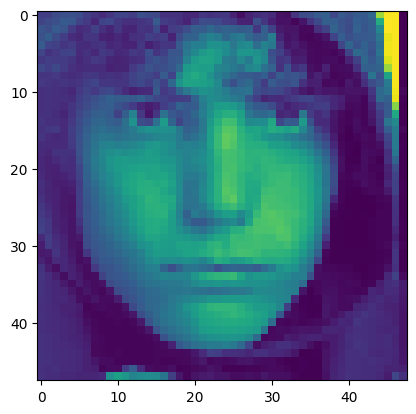

In [ ]:
test_image(1980,X, Model)

1/1 [==============================] - 0s 29ms/step
Predicted Age: 15
Predicted Sex: Male


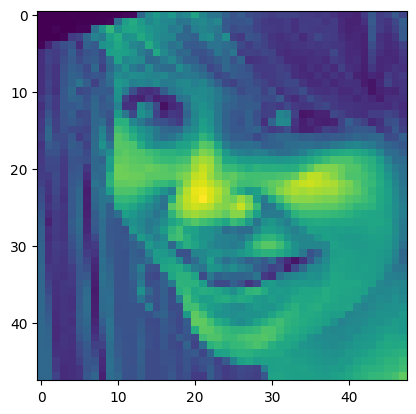

In [ ]:
test_image(2004,X, Model)